1. Load breast cancer dataset (**structured data**)

For more details about the data: https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_breast_cancer.html

In [1]:

from sklearn.datasets import load_breast_cancer

my_data = load_breast_cancer()


2. Visualize the data

- Only **5 points** for visualizing the data
- Use TSNE algorithm: sklearn.manifold.TSNE
- A good and simple code can be found here (they used PCA instead of TSNE): https://skp2707.medium.com/pca-on-cancer-dataset-4d7a97f5fdb8

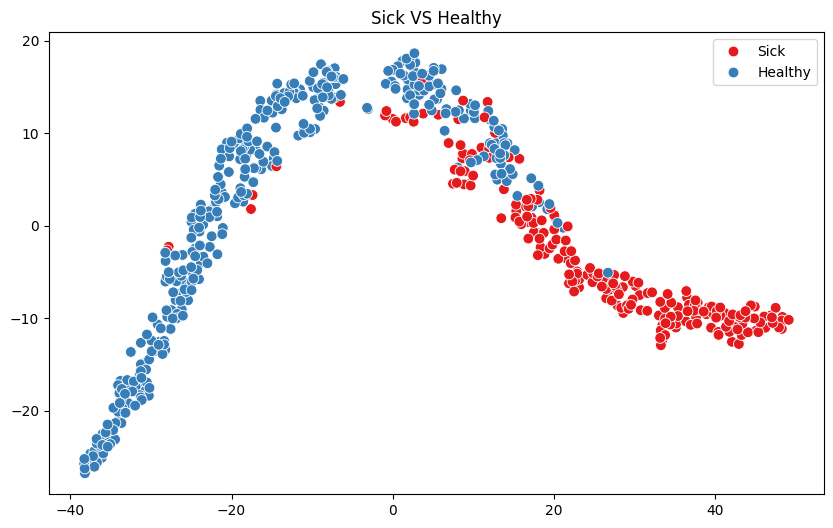

In [62]:
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

my_data = load_breast_cancer()
X = my_data.data
Y = my_data.target

Y_labels =['Sick' if label == 0 else 'Healthy' for label in Y]

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

df_tsne = pd.DataFrame(X_tsne)
df_tsne['target'] = Y_labels

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_tsne, x=df_tsne.iloc[:, 0], y=df_tsne.iloc[:, 1],hue=df_tsne['target'], palette='Set1', s=60)
plt.title("Sick VS Healthy")
plt.xlabel("")
plt.ylabel("")
plt.legend(title= None, loc="best")
plt.show()


3. Split **my_data** to train and test:

- Define X_train, X_test, Y_train, Y_test
- Choose **test_size** for splitting **my_data**
- Use **train_test_split** (for details: https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.train_test_split.html)

In [5]:

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

4. Train **model_decision_tree**

- Library: sklearn.tree.DecisionTreeClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize DecisionTreeClassifier options   

In [6]:
from sklearn.tree import DecisionTreeClassifier

model_decision_tree = DecisionTreeClassifier(random_state=42)
model_decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

5. Train model_random_forest
- Library: sklearn.ensemble.RandomForestClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize RandomForestClassifier options

In [7]:
from sklearn.ensemble import RandomForestClassifier

model_random_forest = RandomForestClassifier(random_state=42)
model_random_forest.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

6. Train model_adaboost

- Library: sklearn.ensemble.AdaBoostClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize AdaBoostClassifier options

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model_adaboost = AdaBoostClassifier(random_state=42)
model_adaboost.fit(X_train, Y_train)


7. Evaluate model_decision_tree, model_random_forest, model_adaboost

- Library: sklearn.metrics
- Data: X_test, Y_test
- **Calculate** and **print** results of each classifier
- **Choose** the decisive metric
- **Compare** between the classifiers and declare the winner


In [47]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def evaluate_model(model, X_test, Y_test):
    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    f1_tree = f1_score(Y_test, Y_pred)
    confusion = confusion_matrix(Y_test, Y_pred)

    return accuracy, precision, recall, f1_tree, confusion

    print("Adaboost Evuluation:")
    print("Accuracy: {ad_metrics[0]}")
    print("Precision: {ad_metrics[1]}")
    print("Recall: {ad_metrics[2]}")
    print("F1 Score: {ad_metrics[3]}")
    print("Confusion Matrix:\n{ad_metrics[4]}")
